In [1]:
def rl_sort(l):
    def _algorithm(l, l_len=len(l), i=1, j=0):
        while True:
            if i == len(l):  # TERMINATE
                break
            elif l[i] > l[j]:  # INCJ
                j += 1
            elif i > j:  # SWAP + INCJ
                l[i], l[j] = l[j], l[i]
                j += 1
            else:  # RESETJ + INCI
                j = 0
                i += 1
    _algorithm(l)
    assert sorted(l) == l


def bubble_sort(l):
    for passnum in range(len(l)-1, 0, -1):
        for i in range(passnum):
            if l[i] > l[i+1]:
                l[i], l[i+1] = l[i+1], l[i]
    assert sorted(l) == l

In [2]:
from rlsort.env import RLSort as rl_env
import time

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1, 1, 1, 0)


LEN = 10
N_EXP = 5
times = {'rl_sort': {}, 'bubble_sort': {}}

for list_len in range(6, 10):
    permutations = rl_env(list_len)._perm.keys()
    for sortMe in [rl_sort, bubble_sort]:
        diff = []
        for n in range(N_EXP):
            start = time.time()
            [sortMe(list(l)) for l in permutations]
            finish = time.time()
            diff.append(finish - start)
        mean = np.mean(diff)
        std = np.std(diff)
        times[sortMe.__name__].update({len(permutations): [mean, std]})
        print('{:12} on {:8,} elements:  {:05.2f}s±{:.2f}'.format(
            sortMe.__name__, len(permutations), mean, std))
    print('----------------------------------')

rl_sort      on      870 elements:  00.01s±0.00
bubble_sort  on      870 elements:  00.01s±0.00
----------------------------------
rl_sort      on    5,910 elements:  00.11s±0.02
bubble_sort  on    5,910 elements:  00.09s±0.02
----------------------------------
rl_sort      on   46,230 elements:  01.21s±0.42
bubble_sort  on   46,230 elements:  01.30s±0.12
----------------------------------
rl_sort      on  409,110 elements:  11.05s±1.24
bubble_sort  on  409,110 elements:  11.25s±1.32
----------------------------------


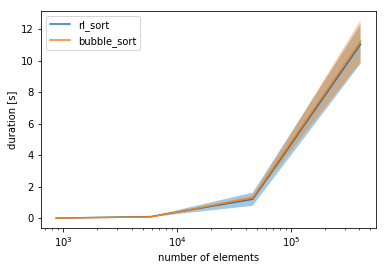

In [3]:
for k, t in times.items():
    means = np.array(list(t.values()))[:, 0]
    stds = np.array(list(t.values()))[:, 1]
    plt.plot(t.keys(), means, label=k)
    plt.fill_between(t.keys(), means - stds, means + stds, alpha=0.4)
# plt.yscale('log')
plt.xscale('log')
plt.xlabel('number of elements')
plt.ylabel('duration [s]')
plt.legend()
plt.show()